In [1]:
from google.colab import files
uploaded = files.upload()

Saving KDDTrain+.csv to KDDTrain+.csv


#IMPORTING LIBRARIES

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [109]:
df = pd.read_csv('KDDTrain+.csv')
#used to read csv files and perform operations on it

df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,2,2.1,0.18,0.19,0.20,0.21,1,0.22,0.23,150,25,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,20,normal
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,neptune


#HANDLING CATEGORICAL DATA

In [110]:
df.drop(df.columns[[3]], axis=1, inplace=True)
df.drop(df.columns[[2]], axis=1, inplace=True)
df.drop(df.columns[[40]], axis=1, inplace=True)

In [111]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[0 2 146 ... 0.0 0.0 0.0]
 [0 1 0 ... 1.0 0.0 0.0]
 [0 1 232 ... 0.01 0.0 0.01]
 ...
 [0 1 2231 ... 0.0 0.01 0.0]
 [0 1 0 ... 1.0 0.0 0.0]
 [0 1 151 ... 0.0 0.0 0.0]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [112]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [114]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.00000000e+00 5.00000000e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 2.24643560e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 1.43482016e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 5.00000000e-01 2.13049053e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.75369525e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 5.00000000e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 2.00005234e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 1.63047745e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 5.00000000e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]

#GRAPHS

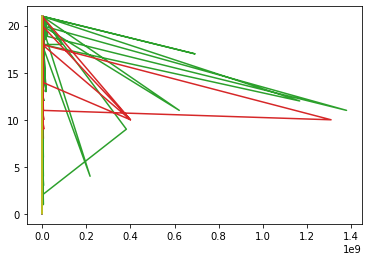

In [115]:
import matplotlib.pyplot as plt 

plt.plot(x, y) 
 

plt.show() 


#ALGORITHM

In [116]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)


#FITTING OF TRAINING DATA

In [117]:
km.fit(x_train,y_train)
#training or fitting the train data into the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [118]:
predictions = km.predict(x_test)

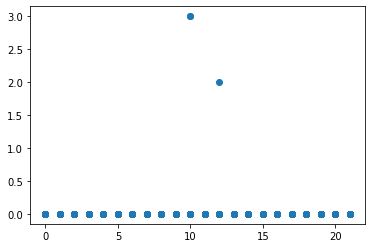

In [119]:
plt.scatter(y_test,predictions)


#EVALUATION

In [120]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.50524916152335
MSE: 385.6763976264661
RMSE: 19.638645514048726


In [122]:
print(metrics.accuracy_score(y_test, predictions))

0.0004762944293397368


#SAVING THE MODEL USING PICKLE LIBRARY

In [123]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(km) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [125]:
from sklearn.metrics import confusion_matrix
y_train=y_train[0:6]
predictions = predictions[0:6]
results =confusion_matrix(y_train, predictions)
print(results)

[[0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [4 0 0 0]]


Precision, Recall, Support, Fscore

In [126]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [127]:
from sklearn.metrics import confusion_matrix
y_test=y_test[0:6]

results =confusion_matrix(y_test, predictions)
print(results)

[[0 0 0]
 [1 0 0]
 [5 0 0]]


Precision, Recall, Support, Fscore

In [128]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)